#### <center> Objective-1 [Prepare & QA the Data] </center>
Your first objective is to get the data ready for analysis by importing and joining the data, creating new columns, and performing basic profiling and QA.
<br>
**Tasks**:
1. Import the World Bank Excel file.
2. Use "GDP" and "GDP per Capita" to calculate population in millions and create a "Population (M)" column.
3. Perform basic profiling & QA on the data.
4. Filter the data to 2014 and join it with the HDI csv file on "Country Code".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Lato'

In [2]:
wbEco_df = pd.read_excel('WorldBank.xlsx').rename({"Country Name" : "Country"}, axis = 1)
wbEco_df.head()

,Country,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735


In [3]:
wbEco_df['Population (M)'] = wbEco_df['GDP (USD)'] / wbEco_df['GDP per capita (USD)'] / 1_000_000
wbEco_df.head()

,Country,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
0,Afghanistan,AFG,South Asia,Low income,2018,NaN,NaN,NaN,1.936300e+10,520.897,NaN,47.9,NaN,56.9378,1.542,37.172416
1,Afghanistan,AFG,South Asia,Low income,2017,33.211,6.575,NaN,2.019180e+10,556.302,13.50,49.5,64.130,55.5960,1.559,36.296472
2,Afghanistan,AFG,South Asia,Low income,2016,33.981,6.742,NaN,1.936260e+10,547.228,11.20,51.2,63.763,54.1971,1.634,35.383058
3,Afghanistan,AFG,South Asia,Low income,2015,34.809,6.929,NaN,1.990710e+10,578.466,8.26,53.1,63.377,52.7121,1.679,34.413604
4,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.00,55.1,62.966,51.1148,1.735,33.370856


In [4]:
wbEco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 16 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Country                                                       12449 non-null  object 
 1   Country Code                                                  12449 non-null  object 
 2   Region                                                        12449 non-null  object 
 3   IncomeGroup                                                   12449 non-null  object 
 4   Year                                                          12449 non-null  int64  
 5   Birth rate, crude (per 1,000 people)                          11440 non-null  float64
 6   Death rate, crude (per 1,000 people)                          11416 non-null  float64
 7   Electric power consumption (kWh per capita)                   5848 

In [5]:
wbEco_df.isnull().sum()

Country                                                            0
Country Code                                                       0
Region                                                             0
IncomeGroup                                                        0
Year                                                               0
Birth rate, crude (per 1,000 people)                            1009
Death rate, crude (per 1,000 people)                            1033
Electric power consumption (kWh per capita)                     6601
GDP (USD)                                                       2871
GDP per capita (USD)                                            2874
Individuals using the Internet (% of population)                7385
Infant mortality rate (per 1,000 live births)                   2465
Life expectancy at birth (years)                                1273
Population density (people per sq. km of land area)              604
Unemployment (% of total labor for

In [6]:
wbEco_df.describe()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M)
count,12449.00000,11440.000000,11416.000000,5848.000000,9.578000e+03,9575.000000,5064.000000,9984.000000,11176.000000,11845.000000,5208.000000,9575.000000
mean,1989.00000,28.643276,10.588539,3175.294686,1.700740e+11,8231.812259,23.334471,51.704437,64.044692,318.861370,8.295079,29.956728
std,17.03007,13.131893,5.489382,4467.139298,8.979866e+11,16173.539954,28.319388,46.131039,11.491087,1593.406041,6.290703,115.803824
min,1960.00000,6.900000,1.127000,0.000000,8.824450e+06,34.790600,0.000000,1.400000,18.907000,0.098625,0.140000,0.008913
25%,1974.00000,16.600000,6.863750,390.385750,1.393010e+09,513.145500,0.594949,14.475000,55.917750,19.783400,3.687000,1.051937
50%,1989.00000,27.545500,9.200000,1541.895000,7.275305e+09,1852.810000,8.406225,37.000000,67.276000,64.007500,6.775000,5.390515
75%,2004.00000,40.881250,12.687000,4313.767500,4.857782e+10,7774.565000,41.295950,78.200000,72.692250,144.823000,11.212250,17.075158
max,2018.00000,58.227000,54.444000,54799.200000,2.050000e+13,189171.000000,100.000000,279.400000,85.417100,21389.100000,37.940000,1391.895280


In [7]:
hdi_df = pd.read_csv('HDI.csv')
hdi_df.head()

,iso3,country,hdicode,region,hdi_rank_2021,hdi_1990,hdi_1991,hdi_1992,hdi_1993,hdi_1994,...,mf_2012,mf_2013,mf_2014,mf_2015,mf_2016,mf_2017,mf_2018,mf_2019,mf_2020,mf_2021
0,AFG,Afghanistan,Low,SA,180.0,0.273,0.279,0.287,0.297,0.292,...,1.86,1.88,1.66,1.62,1.66,1.41,1.32,1.38,1.38,1.38
1,AGO,Angola,Medium,SSA,148.0,NaN,NaN,NaN,NaN,NaN,...,4.09,4.53,3.97,3.59,2.79,2.64,2.28,2.18,2.18,2.18
2,ALB,Albania,High,ECA,67.0,0.647,0.629,0.614,0.617,0.624,...,12.44,11.49,13.14,12.61,14.39,14.46,12.85,12.96,12.96,12.96
3,AND,Andorra,Very High,NaN,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARE,United Arab Emirates,Very High,AS,26.0,0.728,0.739,0.742,0.748,0.755,...,49.56,49.68,55.49,59.76,64.95,75.61,65.97,68.95,68.95,68.95


In [8]:
[i for i in hdi_df.columns if i.find('2014') != -1]

['hdi_2014',
 'le_2014',
 'eys_2014',
 'mys_2014',
 'gnipc_2014',
 'gdi_2014',
 'hdi_f_2014',
 'le_f_2014',
 'eys_f_2014',
 'mys_f_2014',
 'gni_pc_f_2014',
 'hdi_m_2014',
 'le_m_2014',
 'eys_m_2014',
 'mys_m_2014',
 'gni_pc_m_2014',
 'ihdi_2014',
 'coef_ineq_2014',
 'loss_2014',
 'ineq_le_2014',
 'ineq_edu_2014',
 'ineq_inc_2014',
 'gii_2014',
 'mmr_2014',
 'abr_2014',
 'se_f_2014',
 'se_m_2014',
 'pr_f_2014',
 'pr_m_2014',
 'lfpr_f_2014',
 'lfpr_m_2014',
 'phdi_2014',
 'diff_hdi_phdi_2014',
 'co2_prod_2014',
 'mf_2014']

In [9]:
wb_hdi_2014 = wbEco_df.query("Year == 2014").merge(hdi_df[['iso3', 'hdi_2014']], how='left', left_on='Country Code', right_on='iso3')

wb_hdi_2014.head()

,Country,Country Code,Region,IncomeGroup,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),iso3,hdi_2014
0,Afghanistan,AFG,South Asia,Low income,2014,35.706,7.141,NaN,2.048490e+10,613.856,7.0,55.1,62.966,51.1148,1.735,33.370856,AFG,0.479
1,Albania,ALB,Europe & Central Asia,Upper middle income,2014,12.259,7.219,2309.37,1.322820e+10,4578.670,60.1,8.9,77.813,105.4420,17.490,2.889092,ALB,0.792
2,Algeria,DZA,Middle East & North Africa,Upper middle income,2014,25.538,4.709,1362.87,2.140000e+11,5493.060,29.5,21.8,75.878,16.3425,10.207,38.958249,DZA,0.735
3,American Samoa,ASM,East Asia & Pacific,Upper middle income,2014,17.500,4.200,NaN,6.430000e+08,11525.200,NaN,NaN,NaN,278.9550,NaN,0.055791,NaN,NaN
4,Andorra,AND,Europe & Central Asia,High income: nonOECD,2014,NaN,NaN,NaN,3.350740e+09,42300.300,95.9,3.2,NaN,168.5380,NaN,0.079213,AND,0.871


In [10]:
wb_hdi_2014.describe()

,Year,"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)",Electric power consumption (kWh per capita),GDP (USD),GDP per capita (USD),Individuals using the Internet (% of population),"Infant mortality rate (per 1,000 live births)",Life expectancy at birth (years),Population density (people per sq. km of land area),Unemployment (% of total labor force) (modeled ILO estimate),Population (M),hdi_2014
count,211.0,204.000000,204.000000,139.000000,2.010000e+02,201.000000,199.000000,190.000000,197.000000,208.000000,186.000000,201.000000,188.000000
mean,2014.0,20.859378,7.693044,4270.600563,3.907779e+11,17779.147856,45.738525,23.844211,71.832723,424.474198,8.077554,35.668407,0.709527
std,0.0,10.280302,2.706626,5981.464101,1.546117e+12,27113.375249,28.934518,21.750467,8.130386,1986.297846,6.019114,136.957226,0.152831
min,2014.0,7.900000,1.127000,39.055800,3.729180e+07,248.845000,0.990000,1.800000,49.891000,0.137154,0.190000,0.010972,0.370000
25%,2014.0,11.975000,5.836250,858.174500,6.047810e+09,2163.160000,17.730000,6.800000,66.370000,36.550050,3.767250,1.174332,0.581250
50%,2014.0,17.799000,7.501500,2588.300000,3.133500e+10,6684.800000,46.160000,15.050000,73.429000,88.684650,6.513000,7.130572,0.732000
75%,2014.0,28.663750,9.219250,5478.100000,2.060000e+11,20258.000000,69.890000,36.775000,77.583000,210.380000,10.809000,23.589826,0.824750
max,2014.0,47.988000,16.433000,53832.500000,1.750000e+13,189171.000000,98.160000,93.000000,83.980500,19478.800000,28.030000,1359.233706,0.952000


#### <center> Objective-2 [Prepare the data for visualization]
Your second objective is to transform and shape the data into tables that will be used as the source for data visualizations.
<br>
**Tasks**:
1. Create a "gdp_pivot" table with years as rows, regions as columns, sum of GDP as values.
2. Create "pop_pivot" table with years as rows, regions as columns, and sum of population as values.
3. Create "wb_hdi_by_region" table by calculating the average HDI for each region and sorting from highest average HDI to lowest.

In [11]:
# Converting into millions
gdp_pivot = (wbEco_df.pivot_table(
    index = 'Year',
    columns = 'Region',
    values = 'GDP (USD)',
    aggfunc = 'sum'
) / 1e12).round(2)
gdp_pivot

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,0.15,0.28,0.06,0.01,0.54,0.05,0.03
1961,0.15,0.30,0.06,0.01,0.60,0.05,0.03
1962,0.15,0.33,0.09,0.01,0.65,0.05,0.03
1963,0.17,0.36,0.09,0.02,0.68,0.06,0.03
1964,0.19,0.40,0.11,0.02,0.74,0.07,0.03
1965,0.21,0.44,0.11,0.03,0.80,0.07,0.04
1966,0.24,0.48,0.13,0.03,0.88,0.06,0.04
1967,0.27,0.51,0.13,0.03,0.93,0.07,0.04
1968,0.29,0.53,0.14,0.04,1.02,0.07,0.04


In [12]:
pop_pivot = wbEco_df.pivot_table(
    index = 'Year',
    columns = 'Region',
    values = 'Population (M)',
    aggfunc = 'sum'
).round(2)
pop_pivot

Region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
Year,,,,,,,
1960,872.15,280.75,186.85,59.30,180.62,572.53,168.52
1961,871.19,283.66,192.31,60.95,201.91,584.62,172.58
1962,881.04,286.74,219.09,62.67,205.17,597.17,177.07
1963,902.07,289.79,225.20,64.42,208.37,610.16,181.47
1964,922.57,292.83,231.41,66.23,211.32,623.60,186.05
1965,944.24,295.96,243.08,96.97,214.11,637.47,190.81
1966,969.21,298.76,249.60,99.67,216.66,651.78,196.18
1967,1098.55,301.13,256.20,102.51,219.25,666.53,207.06
1968,1125.33,304.29,262.87,120.00,221.61,681.71,212.49


In [13]:
wb_hdi_by_region = wb_hdi_2014.groupby('Region').agg({'hdi_2014':'mean'}).sort_values(by='hdi_2014', ascending=False)
wb_hdi_by_region

,hdi_2014
Region,
North America,0.922000
Europe & Central Asia,0.845320
Latin America & Caribbean,0.739697
Middle East & North Africa,0.736619
East Asia & Pacific,0.729963
South Asia,0.611125
Sub-Saharan Africa,0.527745


#### <center> Objective-3 [Visualize the data] </center>
Your third objective is to create 5 charts to visualize trends, relationships, and comparisons across regions. <br>
**Tasks**:
1. Create a stacked area chart showing the growth of GDP over time, with each stack representing a geographic region.
2. Create a stacked area chart showing the growth of population over time, with each stack representing a geographic region.
3. Create a bubble chart with life expectancy for each country in the x-axis, GDP per capita in the y-axis (log scale), and population as the bubble size. Color the bubbles by region using the same colors for each as in the previous charts.
4. Create a bar chart to show average HDI by region (make sure the region colors match).
5. Create a scatterplot with power consumption in the x-axis and GDP per capita in the y-axis, then use HDI as a color scale for the dots (make sure to remove outliers like Iceland).

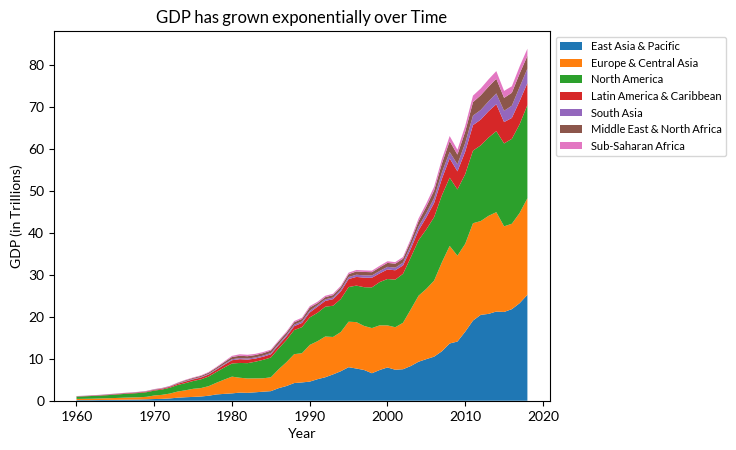

In [14]:
fig, ax = plt.subplots()
ax.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region] for region in gdp_pivot.iloc[-1].sort_values(ascending = False).index],
    labels = gdp_pivot.iloc[-1].sort_values(ascending = False).index
)
ax.set_title('GDP has grown exponentially over Time', fontsize=12)
plt.xlabel('Year')
plt.ylabel('GDP (in Trillions)')
ax.legend(loc = 'upper left', bbox_to_anchor=(1, 1), prop={'size': 8})
plt.savefig('gdpTimeReg_sac.png', bbox_inches='tight')
plt.show()

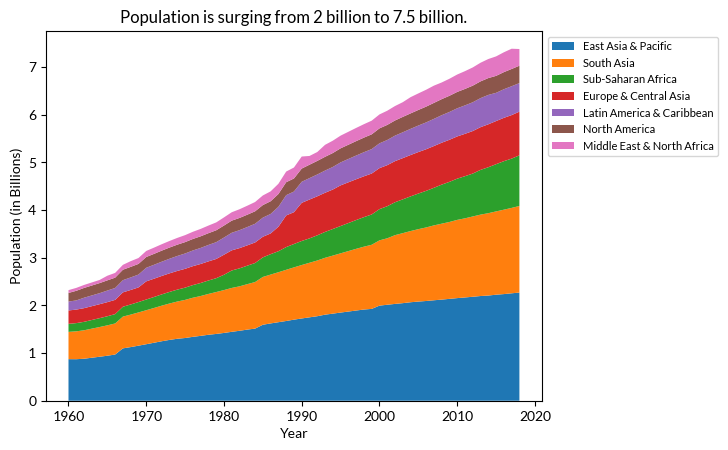

In [15]:
fig, ax = plt.subplots()
ax.stackplot(
    pop_pivot.index,
    [pop_pivot[region] / 1000 for region in pop_pivot.iloc[-1].sort_values(ascending = False).index],
    labels = pop_pivot.iloc[-1].sort_values(ascending = False).index
)
ax.set_title('Population is surging from 2 billion to 7.5 billion.', fontsize=12)
ax.legend(loc = 'upper left', bbox_to_anchor=(1, 1), prop={'size': 8})
plt.xlabel('Year')
plt.ylabel('Population (in Billions)')
plt.savefig('popTimeReg_sac.png', bbox_inches='tight')
plt.show()

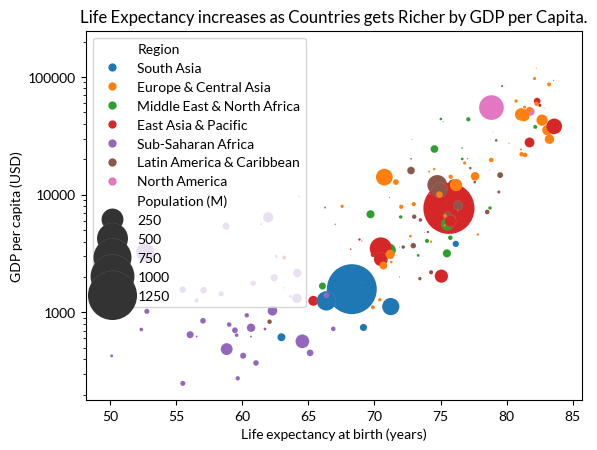

In [16]:
import matplotlib.ticker as mt

fig, ax = plt.subplots() 

minsize = wb_hdi_2014['Population (M)'].min()
maxsize = wb_hdi_2014['Population (M)'].max()

sns.scatterplot(
    data=wb_hdi_2014,
    x = 'Life expectancy at birth (years)',
    y = 'GDP per capita (USD)',
    size = 'Population (M)',
    sizes = (minsize, maxsize),
    hue = 'Region',
    ax = ax
).set(title="Life Expectancy increases as Countries gets Richer by GDP per Capita.", yscale = 'log')
ax.yaxis.set_major_formatter(mt.ScalarFormatter())
plt.savefig('lifeExpGDP_scp.png', bbox_inches = 'tight')
plt.show()

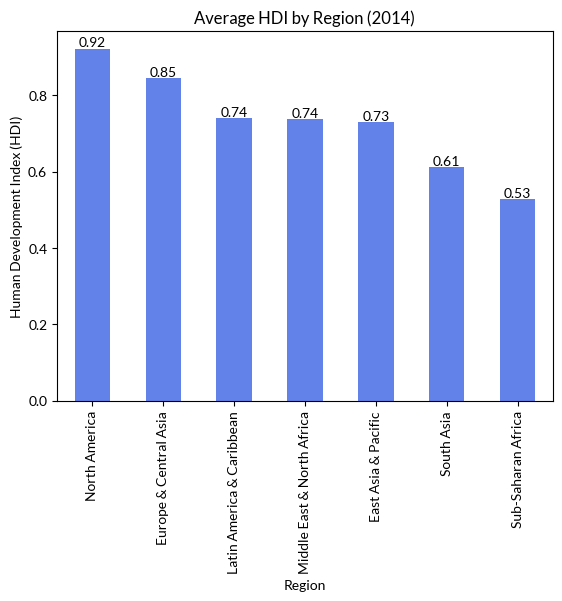

In [17]:
# Use a color palette from Seaborn for automatic coloring by region
colors = sns.color_palette("coolwarm", len(wb_hdi_by_region))

# Plot the data
ax = wb_hdi_by_region.plot(kind='bar', color=colors, legend=False)

# Add data labels to each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",     # Format to 2 decimal points
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Position label on top of each bar
                ha='center', va='bottom', fontsize=10)  # Center-align the labels

# Set title and labels if needed
plt.title("Average HDI by Region (2014)")
plt.xlabel("Region")
plt.ylabel("Human Development Index (HDI)")
plt.savefig('avgHDIReg_bar.png')
plt.show()

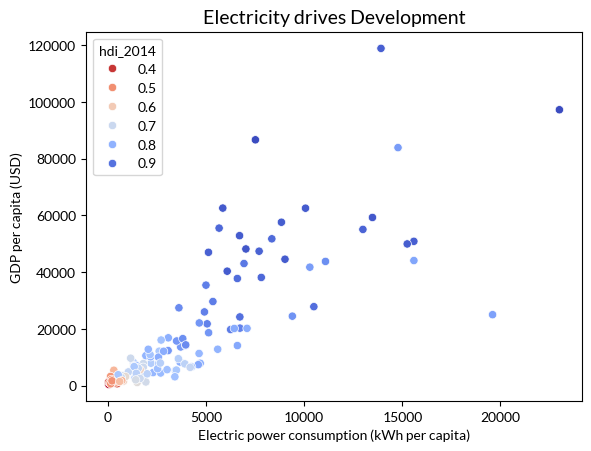

In [18]:
sns.scatterplot(
    data = wb_hdi_2014.query("Country != 'Iceland'"),
    x = 'Electric power consumption (kWh per capita)',
    y = 'GDP per capita (USD)',
    hue = 'hdi_2014',
    palette = 'coolwarm_r'
)
plt.title("Electricity drives Development", fontsize=14)
plt.savefig('powConGDP_scp.png', bbox_inches = 'tight')
plt.show()

#### <center>Objective-4 [Build a final report]</center>
Your final objective is to structure your visualizations into a compelling report on the state of the global economy.<br>
**Tasks**:
1. Assemble the 5 visualizations you have created into a single page (or figure).
2. Add an overall title and descriptive text to add context for the reader.

C:\Users\dell\AppData\Local\Temp\ipykernel_7532\60762305.py:59: UserWarning: The palette list has more values (8) than needed (7), which may not be intended.
  sns.scatterplot(


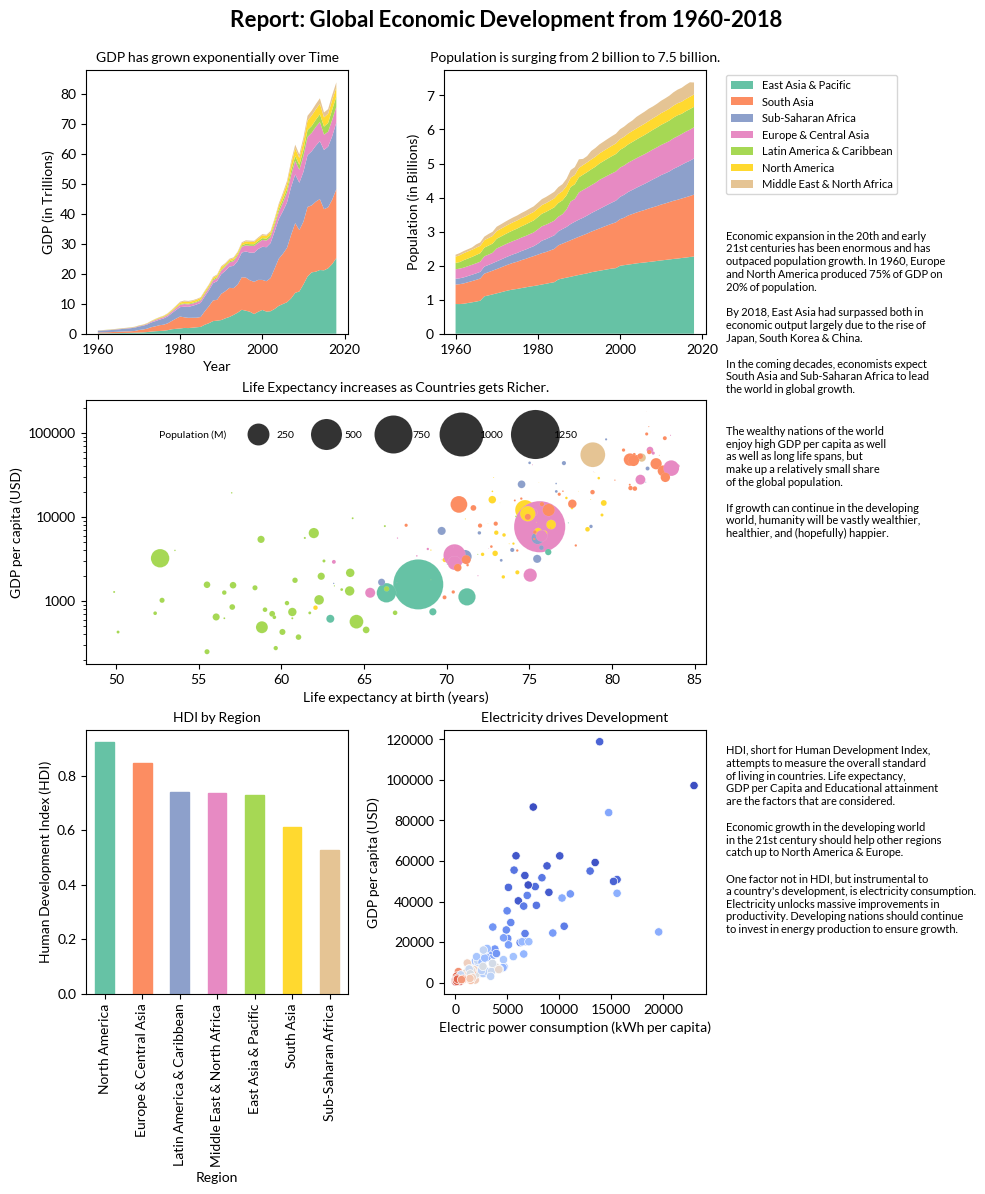

In [19]:
from matplotlib.gridspec import GridSpec as gs

fig = plt.figure(figsize=(8, 12))
gsc = gs(nrows = 12, ncols = 6)

fig.suptitle(
    "Report: Global Economic Development from 1960-2018",
    fontsize = 16,
    fontweight = "bold",
    x = .65,
    y = .93
)

ax1 = fig.add_subplot(gsc[0:4, 0:3])
ax1.stackplot(
    gdp_pivot.index,
    [gdp_pivot[region] for region in gdp_pivot.iloc[-1].sort_values(ascending = False).index],
    labels = gdp_pivot.iloc[-1].sort_values(ascending = False).index,
    colors = list(sns.color_palette("Set2").as_hex())
)
ax1.set_title('GDP has grown exponentially over Time', fontsize=10)
plt.xlabel('Year')
plt.ylabel('GDP (in Trillions)')


text = '''
Economic expansion in the 20th and early
21st centuries has been enormous and has
outpaced population growth. In 1960, Europe
and North America produced 75% of GDP on 
20% of population.

By 2018, East Asia had surpassed both in
economic output largely due to the rise of
Japan, South Korea & China.

In the coming decades, economists expect
South Asia and Sub-Saharan Africa to lead
the world in global growth.
'''
fig.text(.925, .6, text, fontsize = 8)


ax2 = fig.add_subplot(gsc[0:4, 3:6])
ax2.stackplot(
    pop_pivot.index,
    [pop_pivot[region] / 1000 for region in pop_pivot.iloc[-1].sort_values(ascending = False).index],
    labels = pop_pivot.iloc[-1].sort_values(ascending = False).index,
    colors = list(sns.color_palette("Set2").as_hex())
)
ax2.set_title('Population is surging from 2 billion to 7.5 billion.', fontsize=10)
ax2.set_ylabel('Population (in Billions)')
ax2.legend(bbox_to_anchor = (1.75, 1), fontsize = 8)

ax3 = fig.add_subplot(gsc[4:8, :])
minsize = wb_hdi_2014['Population (M)'].min()
maxsize = wb_hdi_2014['Population (M)'].max()

sns.scatterplot(
    data=wb_hdi_2014,
    x = 'Life expectancy at birth (years)',
    y = 'GDP per capita (USD)',
    size = 'Population (M)',
    sizes = (minsize, maxsize),
    hue = 'Region',
    ax = ax3,
    palette = list(sns.color_palette("Set2").as_hex())
).set(yscale = 'log')
ax3.yaxis.set_major_formatter(mt.ScalarFormatter())
ax3.set_title("Life Expectancy increases as Countries gets Richer.", fontsize=10)

handles, labels = ax3.get_legend_handles_labels()
entries_to_skip = len(wb_hdi_2014.Region.unique()) + 1
ax3.legend(
    handles[entries_to_skip:], 
    labels[entries_to_skip:], 
    bbox_to_anchor = (.8, .9), 
    borderaxespad = 0,
    frameon = False,
    ncol = 6,
    fontsize = 7.5)

text2 = '''
The wealthy nations of the world
enjoy high GDP per capita as well
as well as long life spans, but
make up a relatively small share
of the global population.

If growth can continue in the developing
world, humanity will be vastly wealthier,
healthier, and (hopefully) happier.
'''
fig.text(.925, .48, text2, fontsize = 8)

# Plot the data (without specifying color in the plot method)
ax4 = fig.add_subplot(gsc[8:12, 0:3])
wb_hdi_by_region.plot(
    kind='bar',
    legend=False,
    ax=ax4,
    ylabel='Human Development Index (HDI)'
)

# Define color palette
colors = sns.color_palette("Set2").as_hex()

# Apply a different color from the list to each bar individually
for i, bar in enumerate(ax4.patches):
    bar.set_color(colors[i % len(colors)])  # Cycle through colors

# Set title
ax4.set_title('HDI by Region', fontsize=10)

# Determine the number of unique values in 'hdi_2014' for the hue parameter
num_hue_levels = wb_hdi_2014.query("Country != 'Iceland'")['hdi_2014'].nunique()

# Select a color palette with the exact number of colors needed
hdi_palette = sns.color_palette('coolwarm_r', n_colors=num_hue_levels)

# Modify the scatterplot with the adjusted palette
ax5 = fig.add_subplot(gsc[8:12, 3:6])
sns.scatterplot(
    data=wb_hdi_2014.query("Country != 'Iceland'"),
    x='Electric power consumption (kWh per capita)',
    y='GDP per capita (USD)',
    hue='hdi_2014',
    palette=hdi_palette,
    ax=ax5,
    legend=False
)
ax5.set_title('Electricity drives Development', fontsize=10)

text3 = '''
HDI, short for Human Development Index,
attempts to measure the overall standard
of living in countries. Life expectancy,
GDP per Capita and Educational attainment
are the factors that are considered.

Economic growth in the developing world
in the 21st century should help other regions
catch up to North America & Europe.

One factor not in HDI, but instrumental to
a country's development, is electricity consumption.
Electricity unlocks massive improvements in
productivity. Developing nations should continue
to invest in energy production to ensure growth.
'''
fig.text(.925, .15, text3, fontsize = 8)

fig.subplots_adjust(wspace=4, hspace=4)
fig.savefig('report_wbHDIEco.jpg')